In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True, font_scale=1.5)
color = sns.color_palette()
sns.set_style('darkgrid')
import mpl_toolkits
from mpl_toolkits.mplot3d import Axes3D
import pylab 

train = pd.read_csv("X_train.csv")
test = pd.read_csv("X_test.csv")
Y_train = pd.read_csv("Y_train.csv")

In [2]:
from Pipeline import *

In [3]:
df_merged = pd.merge(left=train, right=Y_train, left_on=["Trader"], right_on=["Trader"])

index = [2*i + 1 for i in range(df_merged.shape[0]//2)]

df_merged.drop(index, inplace=True)

We can see that there is a great correlation between the type of trader and the average time per operation


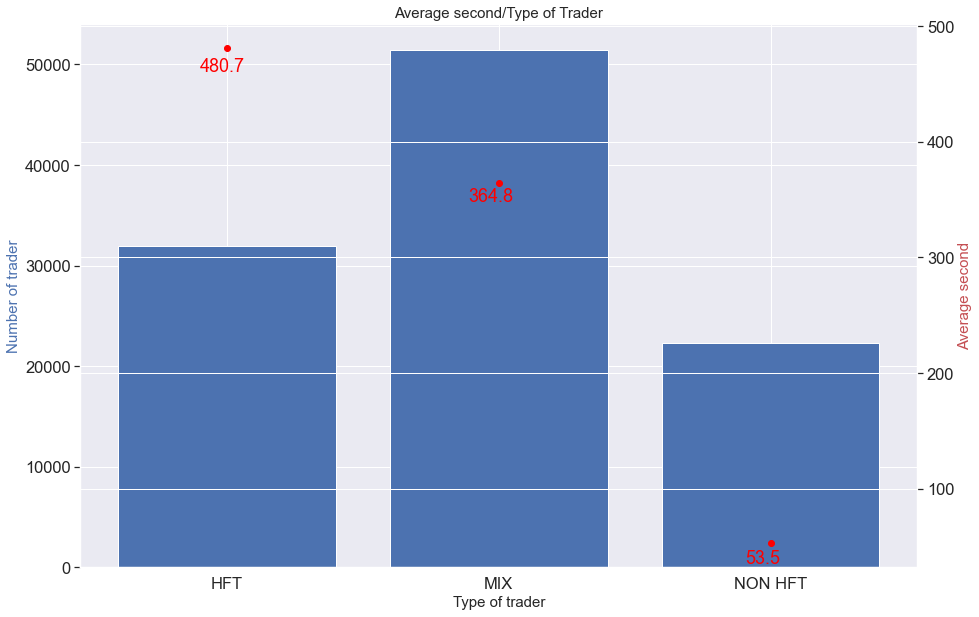

In [4]:
graphique_time(df_merged)

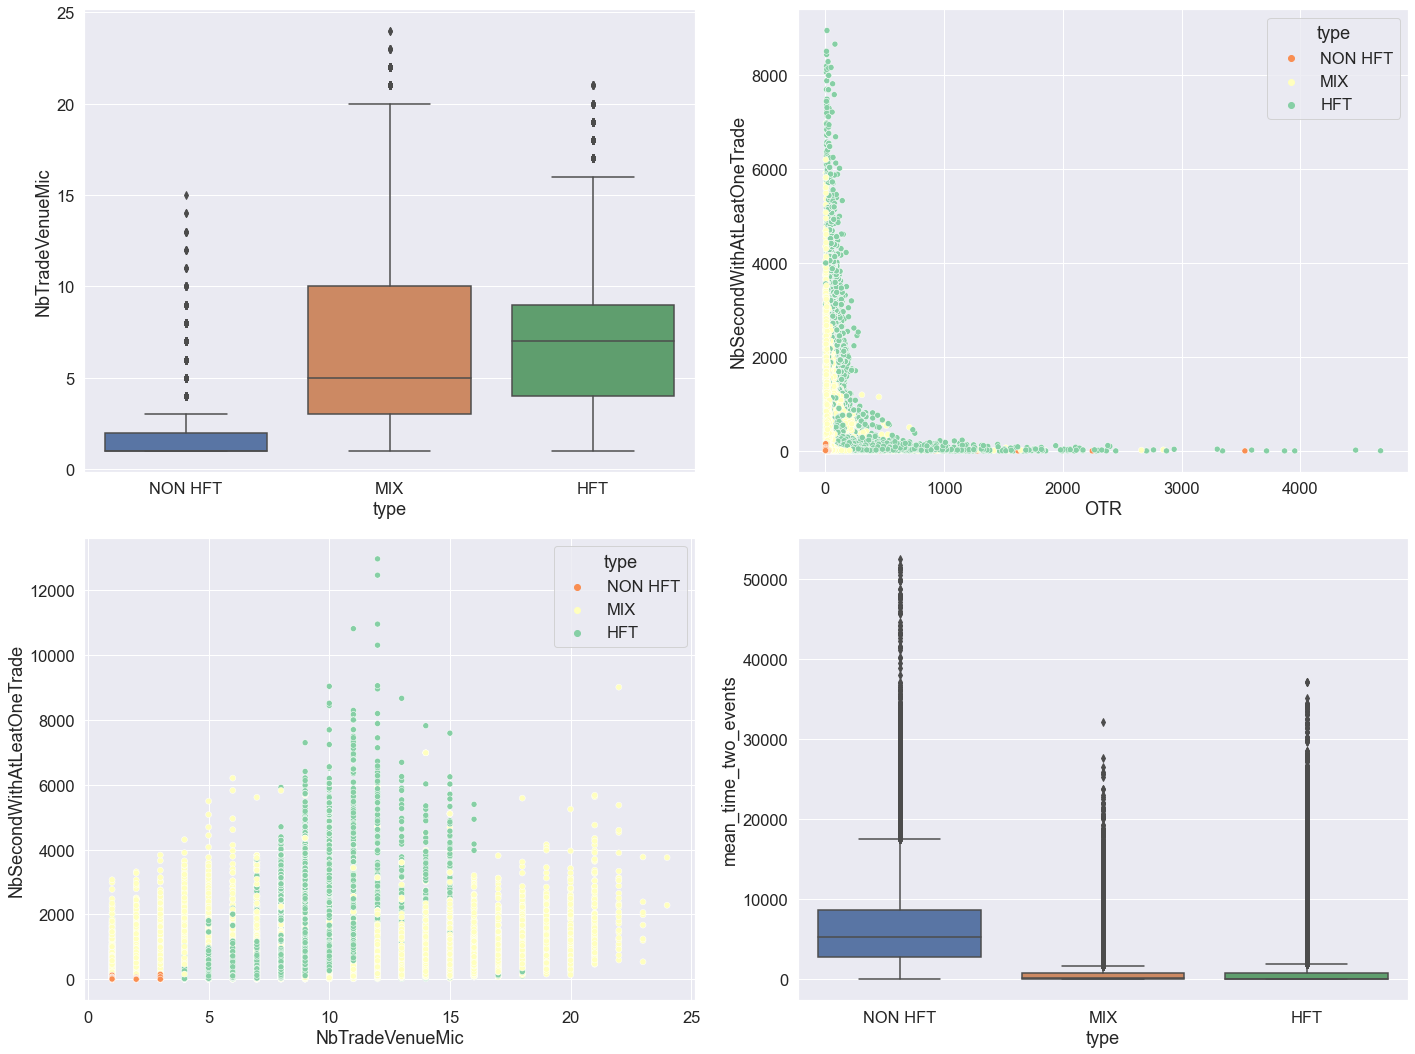

In [5]:
graphique_normal(df_merged)

In [15]:
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier

model = XGBClassifier(alpha=6, colsample_bytree=0.6, gamma=2,
              learning_rate=0.5, max_delta_step=3, max_depth=15,
              min_child_weight=1, n_estimators=1000, 
              reg_alpha=0, reg_lambda=0, subsample=0.8)

X_train = df_merged.drop(["type"], axis=1)
y_train = df_merged["type"]

X_train = clean_data(X_train)

X_train = X_train[['Share', 'Day', 'OTR', 'OCR', 'OMR', 'min_time_two_events',
       'mean_time_two_events', '10_p_time_two_events', 'med_time_two_events',
       '25_p_time_two_events', '75_p_time_two_events', '90_p_time_two_events',
       'max_time_two_events', 'min_lifetime_cancel', 'mean_lifetime_cancel']]

#model.fit(X_train, y_train)

## Application of a PCA

In [31]:
#Here, enter the number of components you wish for the PCA Analysis

PCA = PCA_Analysis(25)

PCA.get_defra_scaled()

,Share,Day,OTR,OCR,OMR,min_time_two_events,mean_time_two_events,10_p_time_two_events,med_time_two_events,25_p_time_two_events,...,min_dt_TV1_TV2,mean_dt_TV1_TV2,med_dt_TV1_TV2,min_dt_TV1_TV3,mean_dt_TV1_TV3,med_dt_TV1_TV3,min_dt_TV1_TV4,mean_dt_TV1_TV4,med_dt_TV1_TV4,NbSecondWithAtLeatOneTrade
0,1.153882,-0.086856,-0.236202,-0.127020,-0.220595,-0.056435,0.470463,-0.063888,-0.119165,-0.093944,...,0.0,0.0,-3.433013e-17,-3.388584e-17,6.413095e-17,0.0,3.408708e-17,6.392338e-17,0.0,-0.511829
1,1.355323,0.698871,-0.240433,0.107288,-0.207427,-0.056435,-0.185661,-0.063888,-0.203653,-0.098566,...,0.0,0.0,-3.433013e-17,-3.388584e-17,6.413095e-17,0.0,3.408708e-17,6.392338e-17,0.0,-0.494769
2,1.355323,-0.244002,-0.242004,0.415368,-0.067091,-0.056435,-0.418488,-0.063888,-0.203654,-0.098566,...,0.0,0.0,-3.433013e-17,-3.388584e-17,6.413095e-17,0.0,3.408708e-17,6.392338e-17,0.0,-0.420329
3,-1.033191,-1.501165,-0.240365,-0.041184,-0.196644,-0.056435,-0.119993,-0.063888,-0.202415,-0.098566,...,0.0,0.0,-3.433013e-17,-3.388584e-17,6.413095e-17,0.0,3.408708e-17,6.392338e-17,0.0,-0.511829
4,1.355323,1.641743,-0.241747,0.129327,0.000000,-0.056435,-0.366792,-0.063888,-0.203654,-0.098566,...,0.0,0.0,-3.433013e-17,-3.388584e-17,6.413095e-17,0.0,3.408708e-17,6.392338e-17,0.0,-0.459100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105777,1.268991,0.384580,-0.244448,0.077130,0.000000,-0.056435,-0.408418,-0.063888,-0.203654,-0.098566,...,0.0,0.0,-3.433013e-17,-3.388584e-17,6.413095e-17,0.0,3.408708e-17,6.392338e-17,0.0,-0.513379
105778,-1.579959,-0.872583,-0.242957,0.077130,0.000000,-0.056435,-0.543385,-0.063888,-0.203654,-0.098566,...,0.0,0.0,-3.433013e-17,-3.388584e-17,6.413095e-17,0.0,3.408708e-17,6.392338e-17,0.0,-0.507176
105779,-1.033191,-1.186874,-0.244472,0.954043,0.000000,-0.056435,-0.414046,-0.063888,-0.203654,-0.098566,...,0.0,0.0,-3.433013e-17,-3.388584e-17,6.413095e-17,0.0,3.408708e-17,6.392338e-17,0.0,-0.493219
105780,-0.486423,0.856016,-0.244233,2.596516,0.000000,-0.056435,-0.478949,-0.063888,-0.203654,-0.098566,...,0.0,0.0,-3.433013e-17,-3.388584e-17,6.413095e-17,0.0,3.408708e-17,6.392338e-17,0.0,-0.463753


The variance explained by the 25 main axes is : 98.934 %


The 25 most important axes are :Index(['Share', 'Day', 'OTR', 'OCR', 'OMR', 'min_time_two_events',
       'mean_time_two_events', '10_p_time_two_events', 'med_time_two_events',
       '25_p_time_two_events', '75_p_time_two_events', '90_p_time_two_events',
       'max_time_two_events', 'min_lifetime_cancel', 'mean_lifetime_cancel',
       '10_p_lifetime_cancel', 'med_lifetime_cancel', '25_p_lifetime_cancel',
       '75_p_lifetime_cancel', '90_p_lifetime_cancel', 'max_lifetime_cancel',
       'NbTradeVenueMic', 'MaxNbTradesBySecond', 'MeanNbTradesBySecond',
       'min_dt_TV1'],
      dtype='object')


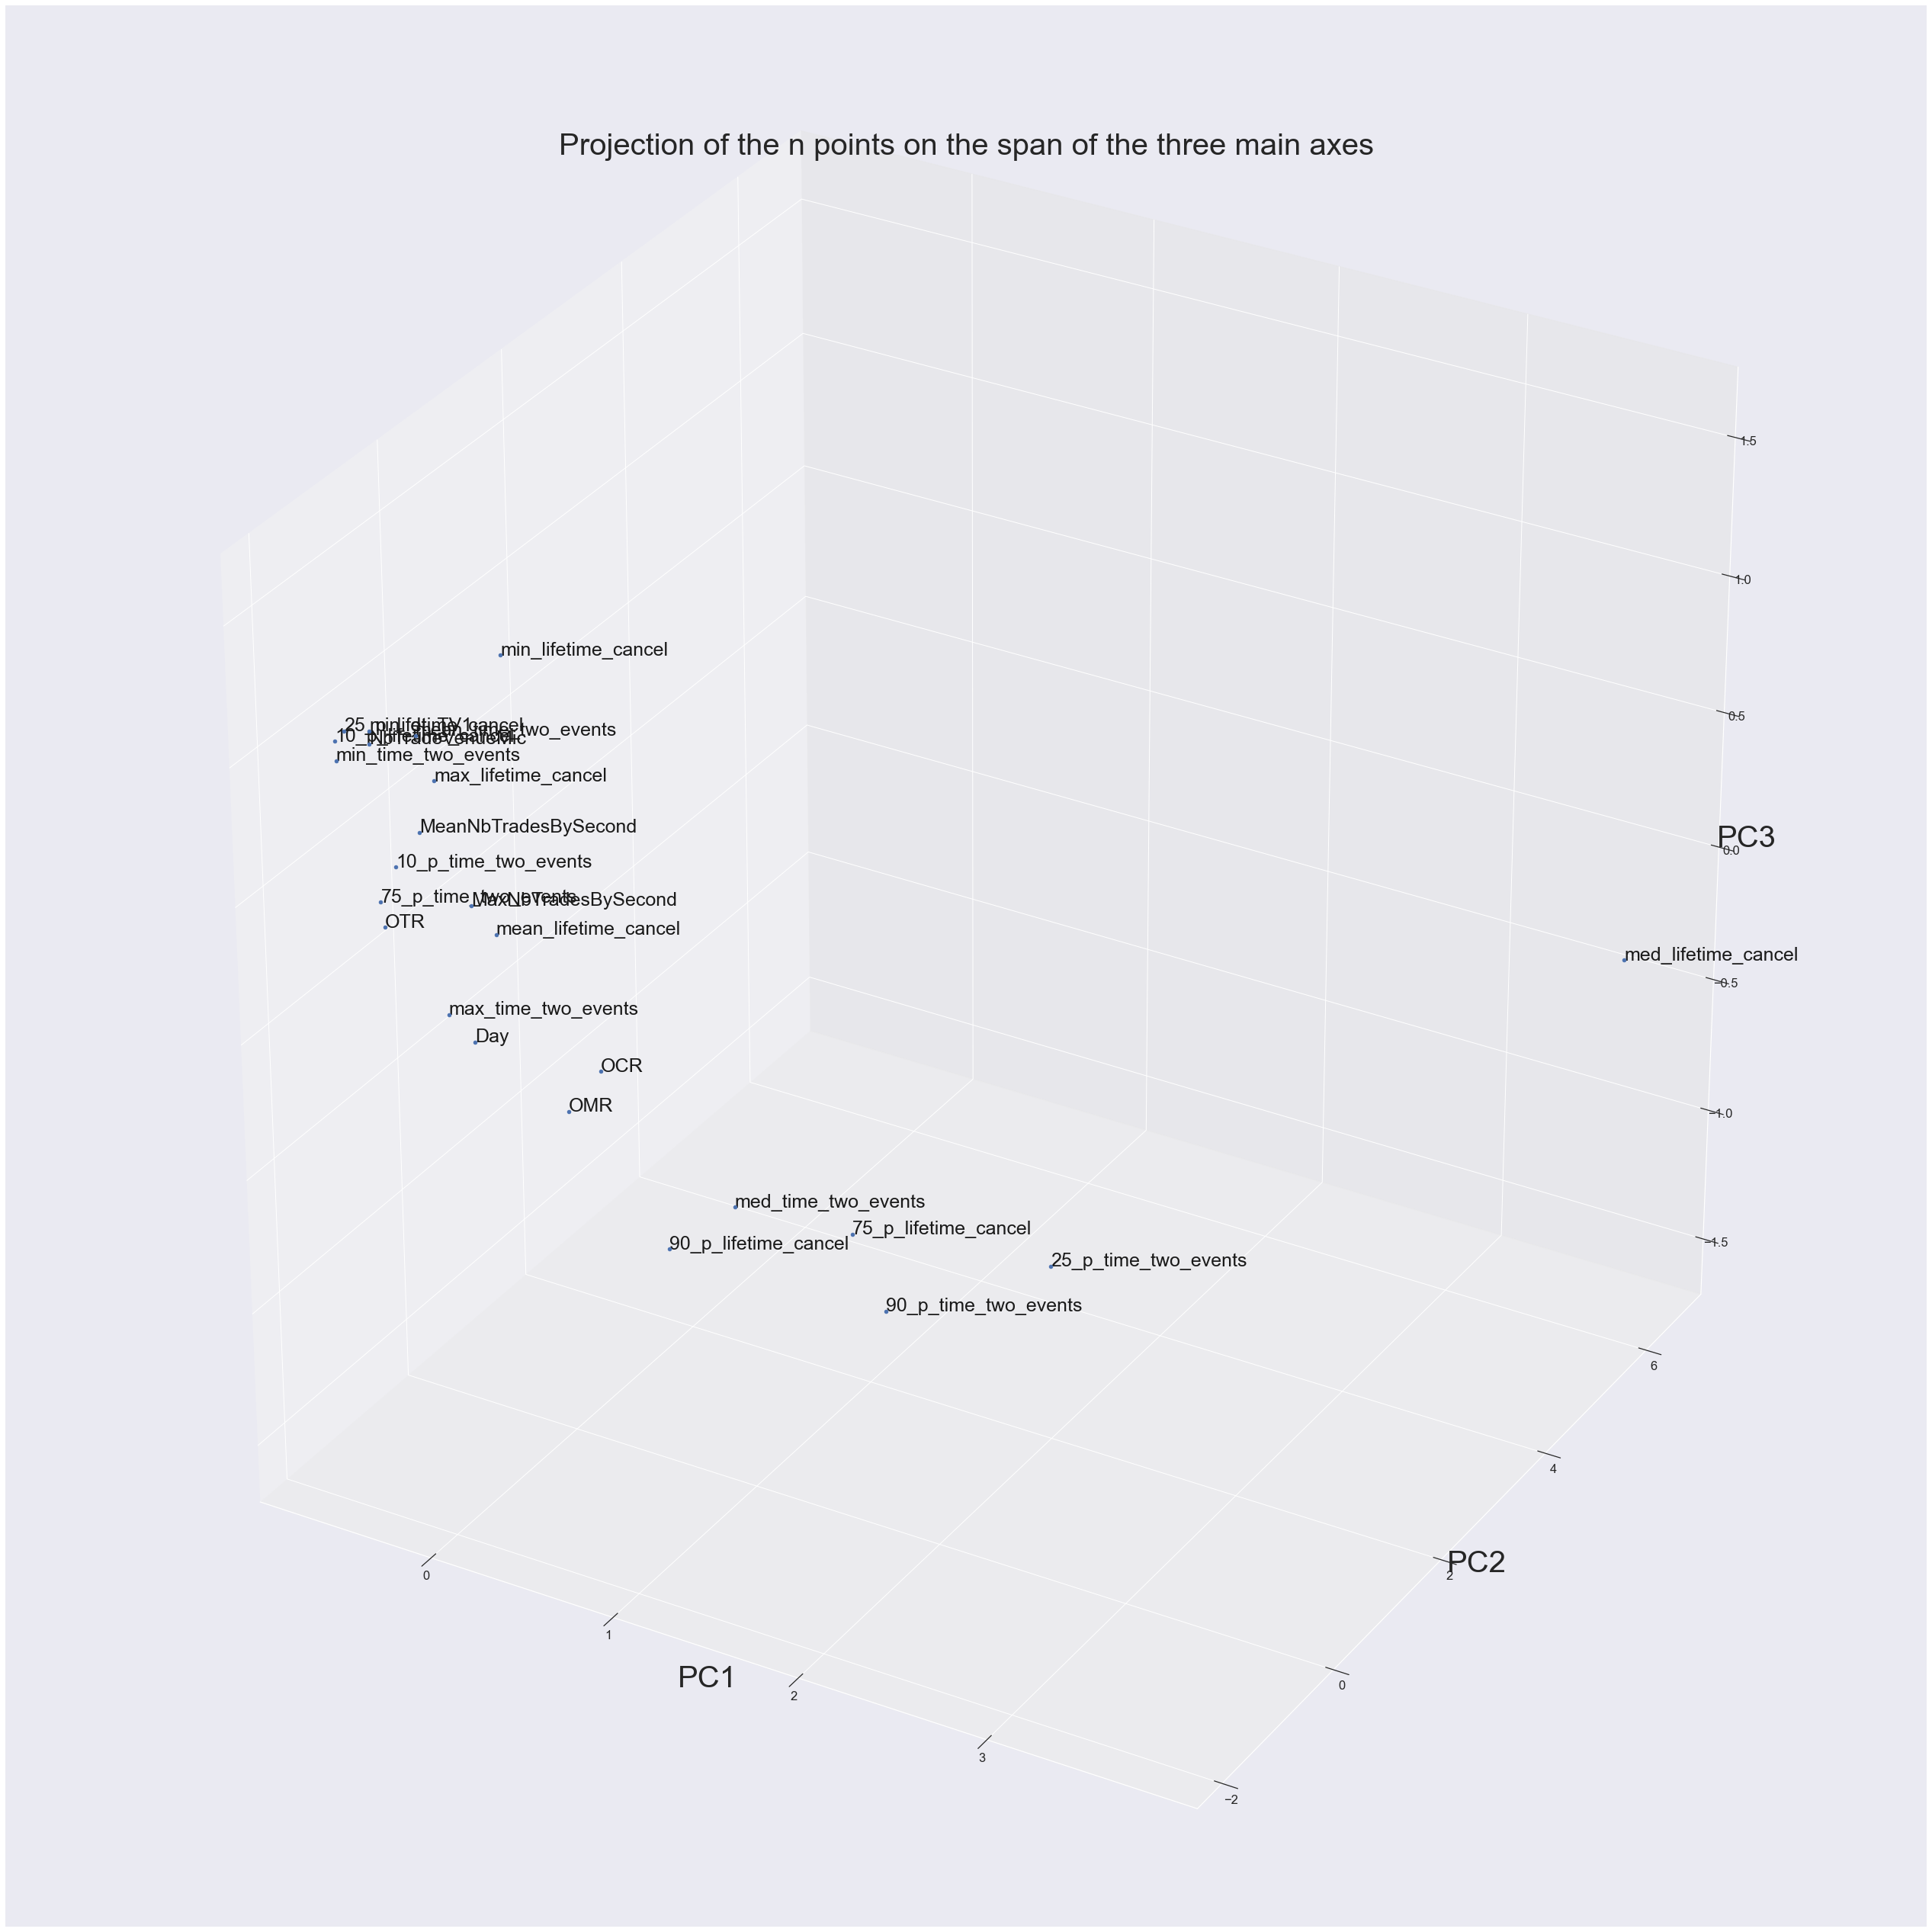

In [32]:
PCA.PCA_graph_3D()

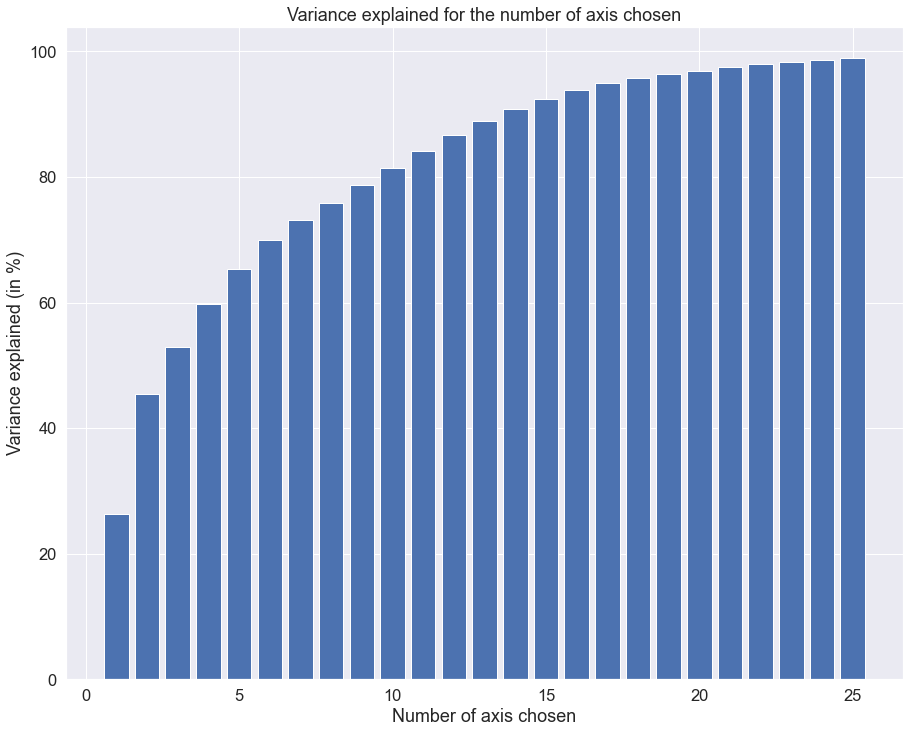

In [33]:
PCA.PCA_Variance()

In [16]:
from sklearn.model_selection import cross_val_score

cross_val_score(model, X_train, y_train, cv=3)

[19:13:04] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:17:14] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:20:48] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


array([0.86234083, 0.8877797 , 0.66857629])

## Creation of the submission file

In [ ]:
test = clean_data(test)

test = test[['Share', 'Day', 'OTR', 'OCR', 'OMR', 'min_time_two_events',
       'mean_time_two_events', '10_p_time_two_events', 'med_time_two_events',
       '25_p_time_two_events']]



In [ ]:
test = pd.read_csv("X_test.csv")
test = clean_data(test)
test = test[["OTR","OCR","OMR","min_time_two_events","mean_time_two_events","10_p_time_two_events", "NbSecondWithAtLeatOneTrade", 'med_time_two_events', '25_p_time_two_events', '75_p_time_two_events',
       '90_p_time_two_events', 'max_time_two_events', 'min_lifetime_cancel',
       'mean_lifetime_cancel', '10_p_lifetime_cancel', 'med_lifetime_cancel',
       '25_p_lifetime_cancel', '75_p_lifetime_cancel', '90_p_lifetime_cancel',
       'max_lifetime_cancel', 'NbTradeVenueMic', 'MaxNbTradesBySecond',
       'MeanNbTradesBySecond', 'min_dt_TV1', 'mean_dt_TV1', 'med_dt_TV1',
       'min_dt_TV1_TV2', 'mean_dt_TV1_TV2', 'med_dt_TV1_TV2', 'min_dt_TV1_TV3',
       'mean_dt_TV1_TV3', 'med_dt_TV1_TV3', 'min_dt_TV1_TV4',
       'mean_dt_TV1_TV4', 'med_dt_TV1_TV4']]

y_pred = model.predict(test)

test = pd.read_csv("X_test.csv")
test["type"] = 0

test = test[["Trader", "type"]]



for i in range(test.shape[0]):
    test["type"][i] = y_pred[i]

In [ ]:
import statistics

submission = pd.DataFrame()
submission["Trader"] = test["Trader"].unique()
submission["type"] = 0

for i in range(submission.shape[0]):
    submission["type"][i] = statistics.mode(test[test["Trader"]==submission["Trader"][i]]["type"])
    
submission.to_csv("Test_.csv", index=False)

## Try with Multi-Layer-Perceptron

In [ ]:
from sklearn . neural_network import MLPClassifier

mlp = MLPClassifier(
              hidden_layer_sizes=(35, 200, 200),
              momentum=0.99999999)

mlp.fit(X_train,y_train)